<a href="https://colab.research.google.com/github/AlyonaKap/ml-projects/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lasso, Ridge and ElasticNet Regressions in California Housing Dataset


In [6]:
#Libraries for working with data and making plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Transform features
from sklearn.preprocessing import StandardScaler

#Prediction models and evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV, Lasso, LassoCV, Ridge, RidgeCV
from sklearn import metrics

#Our dataset
from sklearn.datasets import fetch_california_housing

# **EDA**

**Loading Data**

In [4]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

So we've gotten general information about the dataset. It contains 8 numerical feature variables and medium house value as a target. **Our task is to predict MedHouseVal using regression and to dive into regularization methods such as Lasso, Ridge and ElasicNet.**

**Collecting data into a DataFrame**

In [7]:
X = pd.DataFrame(data = housing['data'], columns = housing['feature_names'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
y = pd.DataFrame(data = housing['target'], columns = housing['target_names'])
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [9]:
df = pd.concat([X,y], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Handling missing and duplicates data**

In [12]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [13]:
df.duplicated().sum()

np.int64(0)

No null-values and duplicates

**Data Distribution**

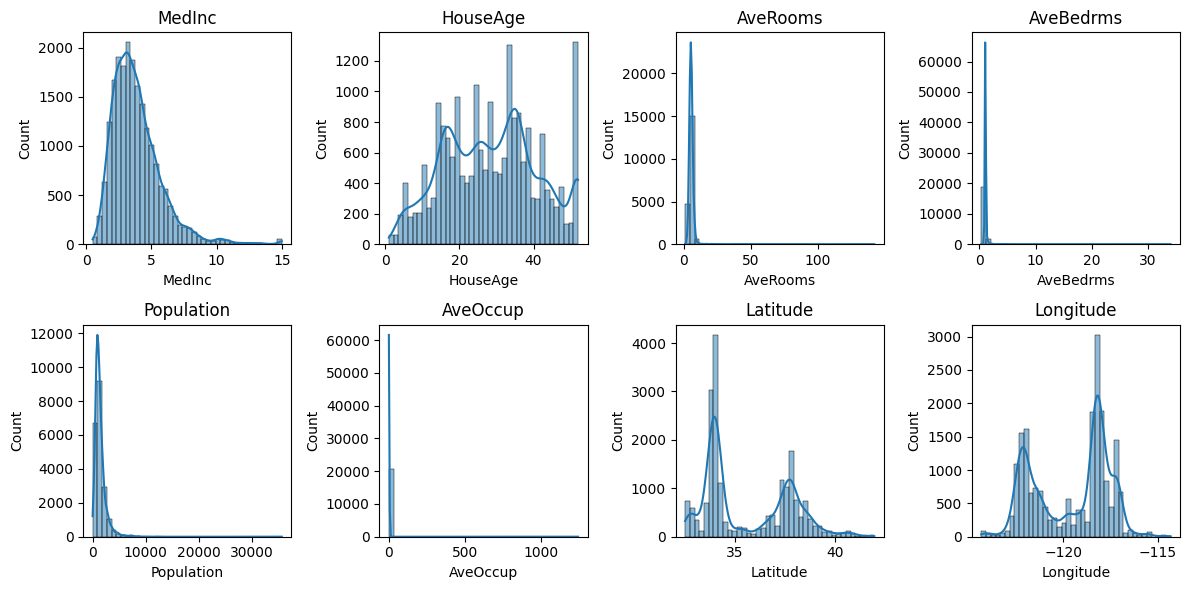

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(12,6))
axes = axes.flatten()

for col, ax in zip(df.columns, axes):
  sns.histplot(x = col, data = df, ax = ax, bins = 40, kde = True)
  ax.set_title(col)

plt.tight_layout()

**Correlation matrix**

<Axes: >

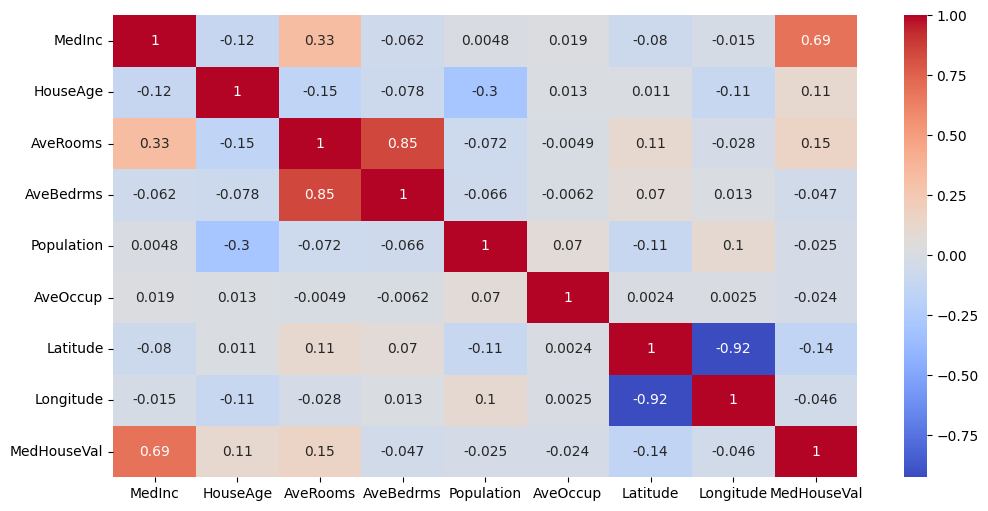

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data = df.corr(), annot=True, cmap ='coolwarm')

The feature MedInc shows the highest correlation with the target variable. Additionally, there is a strong positive relationship between AveRooms and AveBedrms, and a strong negative relationship between Longitude and Latitude.

#**Creating and training the model**

**Split into train/test**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

**Measure dependencies between variables and target using mutual_info_regression**

In [20]:
y_train = y_train.values.ravel()
mi_scores = mutual_info_regression(X_train, y_train, random_state=42)
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

print("Results (mutual_info_regression)")
print(mi_series)

Results (mutual_info_regression)
Longitude     0.380854
MedInc        0.378099
Latitude      0.357824
AveRooms      0.090667
AveOccup      0.073050
HouseAge      0.029654
AveBedrms     0.027982
Population    0.023627
dtype: float64


Mutual Information Regression is a method used to measure the dependence between two variables by evaluating their statistical dependency .
It equals zero when the variables are completely independent and increases as the level of dependency grows.
Unlike correlation, mutual information can capture both linear and non-linear relationships, making it a more flexible tool for identifying the most informative features in a dataset.

**Select features according to the k highest scores**

In [21]:
selector = SelectKBest(score_func=mutual_info_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_mask = selector.get_support()
selected_features = [f for f, m in zip(X.columns, selected_mask) if m]
print(f"Selected features (SelectKBest, k=5): {selected_features}")

Selected features (SelectKBest, k=5): ['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']


**Normalizing numerical variables**

We will use StandartScaler to change normalize the feature values so that each has a mean of 0 and a standard deviation of 1.

In [23]:
scaler = StandardScaler()
Xtr_sc = scaler.set_output(transform='pandas').fit_transform(X_train_selected)
Xte_sc = scaler.transform(X_test_selected)

**Lasso, Ridge, ElasticNet Regressions**

Let's describe regularization methods in simple words.


*   Lasso helps simplify the model by selecting only the most important features. It can shrink some coefficients to exactly zero.
*   Ridge prevents overfitting when features are correlated by shrinking their coefficients toward each other instead of letting any one dominate.
*   ElasticNet combines the strengths of both Lasso and Ridge, performing feature selection while also handling multicollinearity.


In [24]:
models = [Lasso, Ridge, ElasticNet]
models_cv = [LassoCV, RidgeCV, ElasticNetCV]
alphas = np.logspace(-3, 3, 50)
y_preds = {}

for m, cv in zip(models, models_cv):
  if cv is RidgeCV:
    model_cv = cv(alphas=alphas, cv=10)
  else:
    model_cv = cv(alphas=None, cv=10)
  model_cv.fit(Xtr_sc, y_train)

  model = m(alpha = model_cv.alpha_)
  model.fit(Xtr_sc, y_train)
  print(f"\n{m.__name__} Regression Coeficients:\n {model.coef_}")
  print(f"b: {model.intercept_}")

  y_pred = model.predict(Xte_sc)
  y_preds[m.__name__] = y_pred


Lasso Regression Coeficients:
 [ 0.68282463  0.04073681 -0.03417405 -1.04656933 -1.00988893]
b: 2.066636204801854

Ridge Regression Coeficients:
 [ 0.68176104  0.04290275 -0.03486212 -1.05900231 -1.02213244]
b: 2.066636204801854

ElasticNet Regression Coeficients:
 [ 0.68385925  0.039375   -0.03424609 -1.03452908 -0.99799032]
b: 2.066636204801854


# **Model evaluation**

**Predictions from our model**

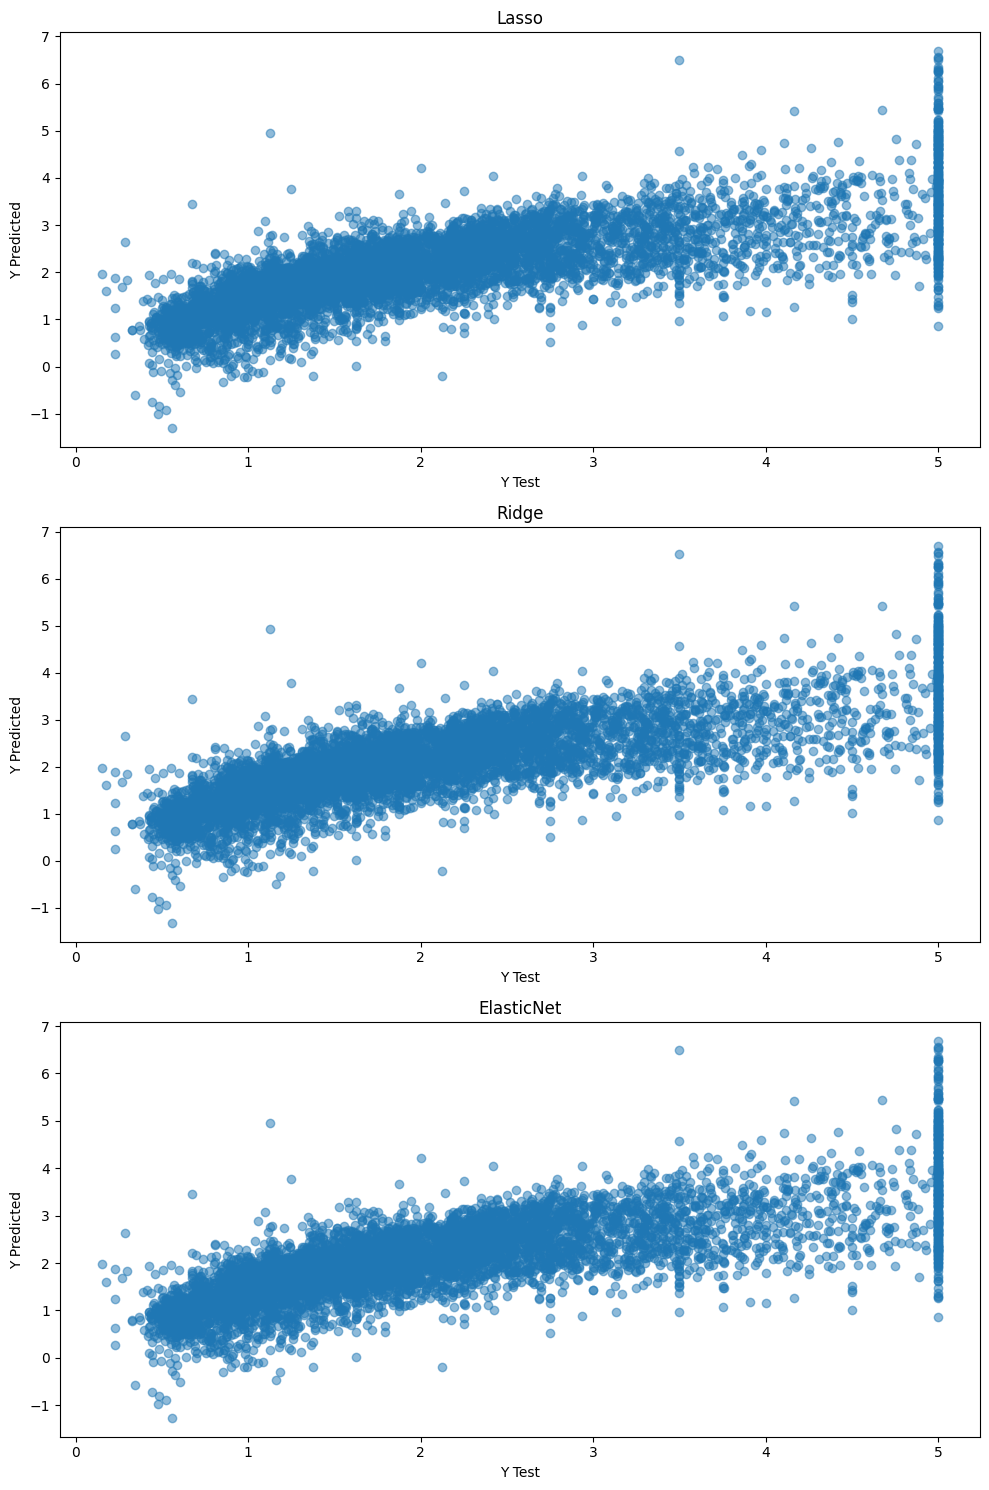

In [26]:
predictions = [y_preds['Lasso'], y_preds['Ridge'], y_preds['ElasticNet']]
titles = ['Lasso', 'Ridge', 'ElasticNet']

fig, axes = plt.subplots(3, 1, figsize = (10,15))
axes = axes.flatten()

for pred, title, ax in zip(predictions, titles, axes):
  ax.scatter(y_test, pred, alpha = 0.5)
  ax.set_title(title)
  ax.set_xlabel('Y Test')
  ax.set_ylabel('Y Predicted')

plt.tight_layout()

**Regression evaluation metrics**

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


In [27]:
for pred, name in zip(predictions, titles):
  print(f'\n{name} evaluating metrics')
  print('MAE:', metrics.mean_absolute_error(y_test, pred))
  print('MSE:', metrics.mean_squared_error(y_test, pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


Lasso evaluating metrics
MAE: 0.5456420826772651
MSE: 0.5523128479418332
RMSE: 0.7431775346051798

Ridge evaluating metrics
MAE: 0.5457131115193957
MSE: 0.5522552803053538
RMSE: 0.7431388028527065

ElasticNet evaluating metrics
MAE: 0.5455836849775155
MSE: 0.5524092561709779
RMSE: 0.7432423939543397


As a conclusion, we can say that all the models show almost identical results. They do not provide a high-quality fit to the data. It can be assumed that the regularized models have no advantage over the ordinary linear regression, so as a continuation of this work, we could try building a simple linear regression model and compare the results.